In [1]:
#------------------------------------------------------------------------------------------------------------------------------
# Import dependencies
#------------------------------------------------------------------------------------------------------------------------------
import json
import sys, re

import requests
import spotipy
import circlify
import warnings
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

from pprint import pprint
from copy import deepcopy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
#------------------------------------------------------------------------------------------------------------------------------
# Low level fns
#------------------------------------------------------------------------------------------------------------------------------
"""put in artist name returns url for image"""
def getArtistImage(artist):
    cid = '230cf876831c41f98414cd63f527ab1e'
    secret = 'c51e114110164f03a228031a53f56c87'
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    results = sp.search(q=artist, limit=1)['tracks']['items'][0]['album']['artists'][0]['id']
    artistImageUrl = sp.artist(results)['images'][0]['url']
    return artistImageUrl


def makeCircle(artist1,artist2):
    myName = []
    myPop = []
    myArtist = []

    try:
        artist = artist1
        tot_d = {}
        limit = 10
        urlraw = f'http://ws.audioscrobbler.com/2.0/?method=artist.gettopalbums&artist={artist1}&api_key=70894b101e887cf7fd9443bd5067f675&format=json&limit={limit}'

        r = requests.get(urlraw)
        tmp = r.json()
        # pprint(tmp)

        data = {}
        for i in range(limit):
            data[tmp['topalbums']['album'][i]['name']] = tmp['topalbums']['album'][i]['playcount']
        # print(data)

        names = list(data.keys())
        values = list(data.values())

        #plt.show()

        tot_d[artist] = sum(values)
        myDf = pd.Series(data).to_frame()#, orient='index')
        #print(myDf)
        myDf = myDf.sort_values(by=[0], ascending=False)
        for i in range(5):
            newName = myDf.index[i]
            newSong = (myDf[0][i])
            myName.append(newName)
            myPop.append(newSong)
            myArtist.append(artist1)

    except:
        print('your artist1 is WRONG')

    try:
        artist = artist2
        tot_d = {}
        limit = 10
        urlraw = f'http://ws.audioscrobbler.com/2.0/?method=artist.gettopalbums&artist={artist2}&api_key=70894b101e887cf7fd9443bd5067f675&format=json&limit={limit}'

        r = requests.get(urlraw)
        tmp = r.json()
        # pprint(tmp)

        data = {}
        for i in range(limit):
            data[tmp['topalbums']['album'][i]['name']] = tmp['topalbums']['album'][i]['playcount']
        # print(data)

        names = list(data.keys())
        values = list(data.values())

        #plt.show()

        tot_d[artist] = sum(values)
        myDf = pd.Series(data).to_frame()#, orient='index')
        #print(myDf)
        myDf = myDf.sort_values(by=[0], ascending=False)
        for i in range(5):
            newName = myDf.index[i]
            newSong = (myDf[0][i])
            myName.append(newName)
            myPop.append(newSong)
            myArtist.append(artist2)

    except:
        print('your artist2 is WRONG')

#     print(myName)
#     print(myPop)
#     print(myArtist)
    myCircleDf = pd.DataFrame({
    'Name': myName,
    'Value': myPop,
    'Artist' : myArtist})
    return(myCircleDf)


"""gives circle graph of top albums"""
def makeCircleGraph(myCircleDf):
    myCircleDf = myCircleDf.sort_values(by=['Value'], ascending=True)
    #print(myCircleDf)
    #print(myCircleDf['Value'].tolist())
    #print(myCircleDf['Name'].tolist())

    circles = circlify.circlify(
        myCircleDf['Value'].tolist(), 
        show_enclosure=True, 
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )
    circles

    # Create just a figure and only one subplot
    fig, ax = plt.subplots(figsize=(10,10))

    # Title
    ax.set_title(f"TOP ALBUMS - {myCircleDf['Artist'][0]} vs. {myCircleDf['Artist'][9]}")

    # Remove axes
    ax.axis('off')

    # Find axis boundaries
    lim = max(
        max(
            abs(circle.x) + circle.r,
            abs(circle.y) + circle.r,
        )
        for circle in circles
    )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    # list of labels
    labels = myCircleDf['Name']
    art1 = myCircleDf['Artist'][0]
    art2 = myCircleDf['Artist'][9]
    arts = myCircleDf['Artist']

    # print circles
    for circle, label, art in zip(circles, labels, arts):
        if art == art1:
            x, y, r = circle
            ax.add_patch(plt.Circle((x, y), r,facecolor="#e3122e", alpha=0.2, linewidth=2))
            plt.annotate(
                  label, 
                  (x,y ) ,
                  va='center',
                  ha='center')
        else:
            x, y, r = circle
            ax.add_patch(plt.Circle((x, y), r,facecolor="#102ede", alpha=0.2, linewidth=2))
            plt.annotate(
                  label, 
                  (x,y ) ,
                  va='center',
                  ha='center')

            
"""gives bar graph of top albums and announce winner"""
def albumsplaycount(artist, code):
    tot_d = {}
    
    try:
        limit = 10
        urlraw = f'http://ws.audioscrobbler.com/2.0/?method=artist.gettopalbums&artist={artist}&api_key=70894b101e887cf7fd9443bd5067f675&format=json&limit={limit}'

        r = requests.get(urlraw)
        tmp = r.json()
        # pprint(tmp)

        data = {}
        for i in range(limit):
            data[tmp['topalbums']['album'][i]['name']] = tmp['topalbums']['album'][i]['playcount']
        # print(data)
    except:
        if artist == '':
            pass
        else:
            print('your artist is WRONG')
    else:
        names = list(data.keys())
        values = list(data.values())

        fig, ax = plt.subplots()
        
        ax.set_title(f'TOP ALBLUMS & PLAYCOUNT - {artist}')
        ax.bar(range(len(data)), values, tick_label=names, color=code)
        
        ax.set_xticklabels(names, rotation = 90)
        ax.ticklabel_format(axis='y', style='plain')
        ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: format(int(y), ',')))

        plt.show()
        
        tot_d[artist] = sum(values)
    finally:
        return tot_d

    
"""gives dict of sim songs"""   
def get_sim_songs(artist, song):
    urlraw = f'https://ws.audioscrobbler.com/2.0/?method=track.getsimilar&artist={artist}&track={song}&api_key=70894b101e887cf7fd9443bd5067f675&format=json'

    dicy = {}

    r = requests.get(urlraw)
    tmp = r.json()
#     pprint(tmp)

    for i in range(len(tmp['similartracks']['track'])):
        songname = tmp['similartracks']['track'][i]['name']
        artistname = tmp['similartracks']['track'][i]['artist']['name']
#         print(f'{artistname}|{songname}')

        dicy[f'{artistname}|{songname}'] = 1

    return dicy


"""gives dict of sim artists""" 
def get_sim_artists(artist):
    urlraw = f'http://ws.audioscrobbler.com/2.0/?method=artist.getsimilar&artist={artist}&api_key=70894b101e887cf7fd9443bd5067f675&format=json'

    dicy = {}

    r = requests.get(urlraw)
    tmp = r.json()
#     pprint(tmp)

    for i in range(len(tmp['similarartists']['artist'])):
        artistname = tmp['similarartists']['artist'][i]['name']
#         print(artistname)

        dicy[f'{artistname}'] = 1

    return dicy
    

"""gives matching dict of two dicts"""
def match(dicy0, dicy1):   # 
    pot = {}
    
    for k0 in dicy0:
        for k1 in dicy1:
            if k0 == k1:
                pot[k1] = 1

    return pot


"""adds new sim songs by specified pair"""
def add_more(dicy, n):
    pair = list(dicy)[n]
#     print(pair)
    
    if '|' in pair:
        artistpair = pair.split('|')[0]
        songpair = pair.split('|')[1]
        
        try:
            dicypair = get_sim_songs(artistpair, songpair)
#             print(dicypair)
        
            dicynew = {**dicy, **dicypair}
        except:
            dicynew = dicy
        
#             print(f'FAILED searching... {pair}')
    else:
        artistpair = pair
        
        try:
            dicypair = get_sim_artists(artistpair)
#             print(dicypair)
        
            dicynew = {**dicy, **dicypair}
        except:
            dicynew = dicy

    
    return dicynew, pair


def iteration(dicy0, dicy1, hist0={}, hist1={}):  
    #---------------------------------------------------------
    # check if sets inital match
    #---------------------------------------------------------
#     print('data0', len(dicy0))
#     print('data1', len(dicy1))

    resraw = match(dicy0, dicy1)
    res = {ky: resraw[ky] for ky in list(resraw.keys())[:10]}
#     print(res)

    if len(res) >= 1:
#         print(len(res), res)
#         print(f'stop after add 0 pair(s)')
        pass
    #---------------------------------------------------------
    # expand song by song until match
    #---------------------------------------------------------
    else:
        for i in range(max(len(dicy0), len(dicy1))):
            ind0 = 'n'
            ind1 = 'n'

            try:
                test0 = list(dicy0)[i]
            except:
                test0 = ''

            try:
                test1 = list(dicy1)[i]
            except:
                test1 = ''

            if test0.strip() and test0 not in hist0:
                dicy0, pair0 = add_more(dicy0, i)

#                 print('dicy0',len(dicy0))

                hist0[pair0] = 1

                ind0 = 'y'

            if test1.strip() and test1 not in hist1:
                dicy1, pair1 = add_more(dicy1, i)

#                 print('dicy1', len(dicy1))

                hist1[pair1] = 1

                ind1 = 'y'

            if not (ind0 == 'n' and ind1 == 'n'):
                res = match(dicy0, dicy1)

                if len(res) >= 1:
#                     print(len(res), res)
#                     print(f'stop after add {i + 1} pair(s)')
                    break

    return res, dicy0, dicy1, hist0, hist1    

In [3]:
#------------------------------------------------------------------------------------------------------------------------------
# high level fns
#------------------------------------------------------------------------------------------------------------------------------
"""bar graph of top artist alblums"""
def main_bars(artist0, artist1):
    color0 = '#e3122e'
    tot0 = albumsplaycount(artist0, color0)
    # print(tot0)
    
    color1 = '#102ede'
    tot1 = albumsplaycount(artist1, color1)
    # print(tot1)
    
    tot0.update(tot1)
    
    if len(tot0) > 1:
        print(f'{max(tot0, key=tot0.get)} is the more popular artist!')

        
"""circle graph of top artist alblums"""
def main_circles(artist0, artist1):
    makeCircleGraph(makeCircle(artist0,artist1))

    print(f'See what {artist0} looks like! {getArtistImage(artist0)}')
    print(f'See what {artist1} looks like! {getArtistImage(artist1)}')
    

"""list of similar songs to two songs"""
def main_songs(artist0, song0, artist1, song1):
    try:
        d0 = get_sim_songs(artist0, song0)
    except:
        print(f"""your artist ({artist0}) or song ({song0}) is WRONG""")
        
    try:
        d1 = get_sim_songs(artist1, song1)
    except:
        print(f"""your artist ({artist1}) or song ({song1}) is WRONG""")
        
    # first iteration pair by pair
    try:
        res, d00, d11, h00, h11 = iteration(d0, d1)
        
        print(f'TOP {len(res)} SONG(S) YOU MAY LIKE:')
        print('-' * 100)

        for k in res:
            print(f"{k.split('|')[0]} - {k.split('|')[1]}")
    except:
        pass

    
"""list of similar artists to two artists"""
def main_artists(artist0, artist1):
    try:
        d0 = get_sim_artists(artist0)
    except:
        print(f"""your artist ({artist0}) is WRONG""")
    
    try:
        d1 = get_sim_artists(artist1)
    except:
        print(f"""your artist ({artist1}) is WRONG""")
        
    # first iteration pair by pair
    try:
        res, d00, d11, h00, h11 = iteration(d0, d1)

        print(f'TOP {len(res)} ARTIST(S) YOU MAY LIKE:')
        print('-' * 100)

        for k in res:
            print(k)
    except:
        pass

In [4]:
#------------------------------------------------------------------------------------------------------------------------------
# Test two artists and respective songs
#------------------------------------------------------------------------------------------------------------------------------
artist0 = "psy"
song0 = "gangnam style"
#------------------------------------------------------------------------------------------------------------------------------
# artist0 = "eminem"
# song0 = "mockingbird"
#------------------------------------------------------------------------------------------------------------------------------
# artist0 = "nickelback"
# song0 = "far away"
#------------------------------------------------------------------------------------------------------------------------------
# artist0 = "justin bieber"
# song0 = "baby"
#------------------------------------------------------------------------------------------------------------------------------
# artist0 = 'the chainsmokers'
# song0 = 'something just like this'
#------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------
artist1 = "blackpink"
song1 = "whistle"
#------------------------------------------------------------------------------------------------------------------------------
# artist1 = "Nicki Minaj"
# song1 = "anaconda"
#------------------------------------------------------------------------------------------------------------------------------
# artist1 = "drake"
# song1 = "god's plan"
#------------------------------------------------------------------------------------------------------------------------------
# artist1 = 'taylor swift'
# song1 = 'look what you made me do'
#------------------------------------------------------------------------------------------------------------------------------
# artist1 = 'lady gaga'
# song1 = 'just dance'
#------------------------------------------------------------------------------------------------------------------------------


#------------------------------------------------------------------------------------------------------------------------------
# Input two artists and respective songs
#------------------------------------------------------------------------------------------------------------------------------
# artist0 = input('pick artist? ').title()
# song0 = input(f'pick song for {artist0}? ')

# artist1 = input('pick artist? ').title()
# song1 = input(f'pick song for {artist1}? ')

----------------------------------------------------------------------------------------------------
See what psy looks like! https://i.scdn.co/image/ab6761610000e5ebe07d6b0f2fcc2f2ba6bdc3ce
See what blackpink looks like! https://i.scdn.co/image/ab6761610000e5eb9f73197444a8a6b016f4a546


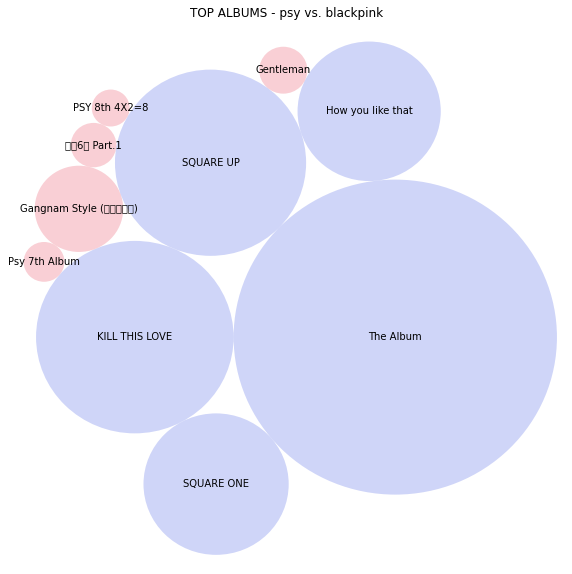

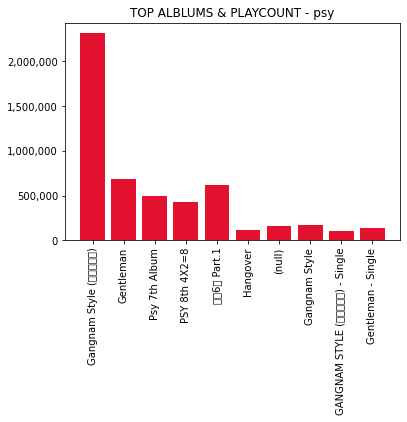

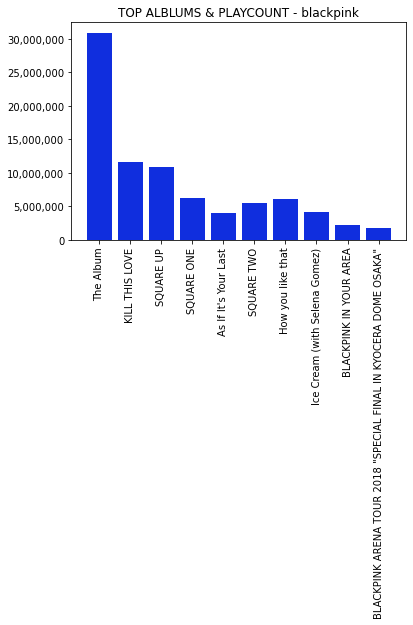

blackpink is the more popular artist!
----------------------------------------------------------------------------------------------------
TOP 10 SONG(S) YOU MAY LIKE:
----------------------------------------------------------------------------------------------------
BLACKPINK - BOOMBAYAH
MOMOLAND - BBoom BBoom
2NE1 - I Am The Best
Hwa Sa - Maria
miss A - Hush
CHUNG HA - Bicycle
(G)I-DLE - LATATA
Everglow - Dun Dun
MAMAMOO - HIP
Jennie - SoLo
----------------------------------------------------------------------------------------------------
TOP 10 ARTIST(S) YOU MAY LIKE:
----------------------------------------------------------------------------------------------------
G-Dragon
GD X TAEYANG
2NE1
승리
태양
Bigbang
현아
4minute
miss A
CL
----------------------------------------------------------------------------------------------------


In [5]:
if __name__ == '__main__':
    warnings.filterwarnings("ignore")

    #---------------------------------------------------------------------------------------------------------------------------
    # output visual 1
    #---------------------------------------------------------------------------------------------------------------------------
    print('-' * 100)
    main_circles(artist0, artist1)
    #---------------------------------------------------------------------------------------------------------------------------
    # output visual 2
    #---------------------------------------------------------------------------------------------------------------------------
    main_bars(artist0, artist1)
    print('-' * 100)
    #---------------------------------------------------------------------------------------------------------------------------
    # output visual 3
    #---------------------------------------------------------------------------------------------------------------------------
    main_songs(artist0, song0, artist1, song1)
    print('-' * 100)
    #---------------------------------------------------------------------------------------------------------------------------
    # output visual 4
    #---------------------------------------------------------------------------------------------------------------------------
    main_artists(artist0, artist1)
    print('-' * 100)